# Market Basket Analysis using Python

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# The following lines of code are used to suppress DeprecationWarnings in Python.
# Specifically, it suppresses warnings related to deprecated features that will
# eventually be removed or modified in future versions of Python or libraries.

import warnings  # Import the warnings module to handle warnings in Python.

# Suppress all warnings of type DeprecationWarning to prevent them from being displayed.
warnings.filterwarnings("ignore", category=DeprecationWarning)


### Reading the Dataset

In [52]:
data = pd.read_csv('/content/Groceries_dataset.csv')

In [70]:
print(data)

       Member_number        Date        itemDescription  Quantity
0               1808  21-07-2015         tropical fruit         1
1               2552  05-01-2015             whole milk         1
2               2300  19-09-2015              pip fruit         1
3               1187  12-12-2015       other vegetables         1
4               3037  01-02-2015             whole milk         1
...              ...         ...                    ...       ...
38760           4471  08-10-2014          sliced cheese         1
38761           2022  23-02-2014                  candy         1
38762           1097  16-04-2014               cake bar         1
38763           1510  03-12-2014  fruit/vegetable juice         1
38764           1521  26-12-2014               cat food         1

[38765 rows x 4 columns]


### Data Exploration

In [53]:
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:10]

In [54]:
x

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


<Axes: xlabel='itemDescription'>

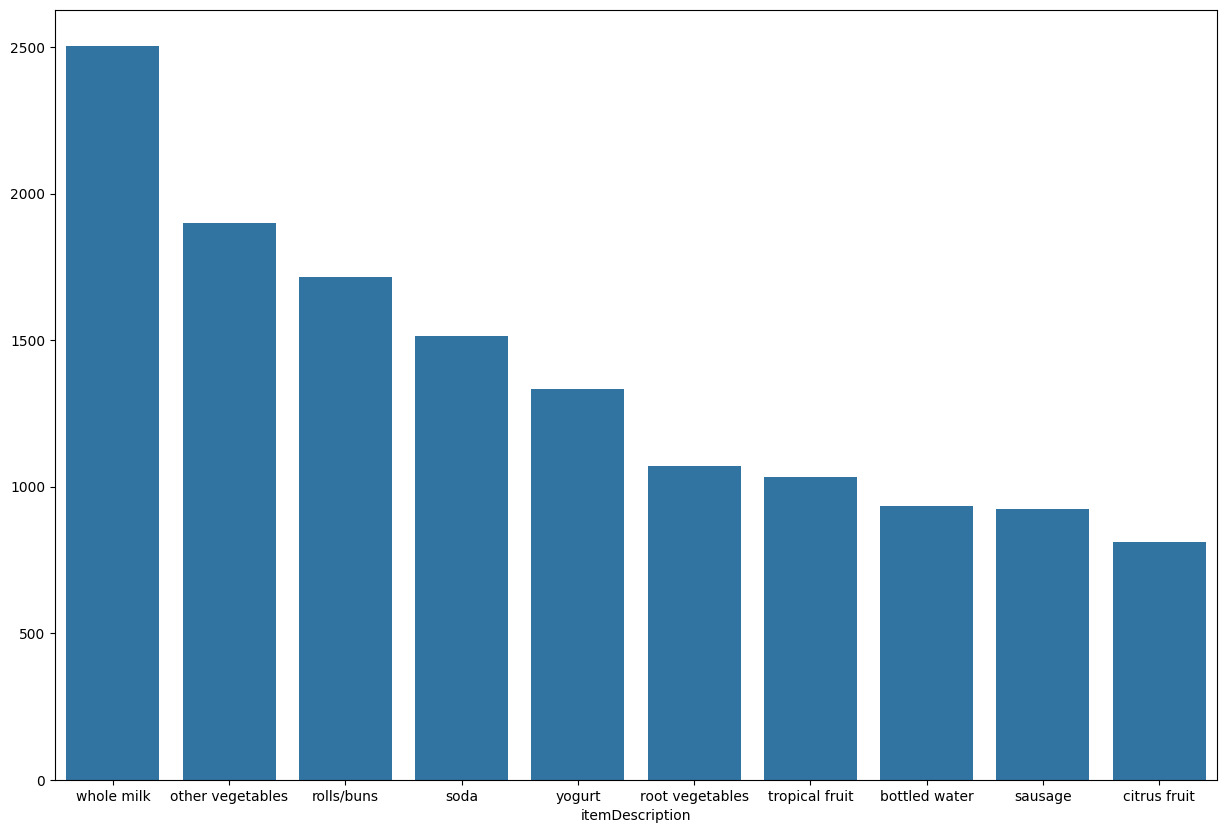

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x=x.index, y=x.values)


## Apriori Algorithm

It is an algorithm that uses frequent itemset to generate association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset.

Support : It is the frequency of item a or combination of item A and B.

Confidence: It tells us how often the items a and b occur given that a is bought.

Lift: It tells us the strength of the rule.

Support = freq(A,B)/N

A and B  Products

N is total Transactions

Confidence = freq(A,B) / freq(A)

Lift = Support / support(A) * Support(B)

!pip install mlxtend

Command prompt: pip install mlxtend

In [56]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [69]:
print(data)

       Member_number        Date        itemDescription  Quantity
0               1808  21-07-2015         tropical fruit         1
1               2552  05-01-2015             whole milk         1
2               2300  19-09-2015              pip fruit         1
3               1187  12-12-2015       other vegetables         1
4               3037  01-02-2015             whole milk         1
...              ...         ...                    ...       ...
38760           4471  08-10-2014          sliced cheese         1
38761           2022  23-02-2014                  candy         1
38762           1097  16-04-2014               cake bar         1
38763           1510  03-12-2014  fruit/vegetable juice         1
38764           1521  26-12-2014               cat food         1

[38765 rows x 4 columns]


In [58]:
data['Quantity'] = 1

In [71]:
print(data)

       Member_number        Date        itemDescription  Quantity
0               1808  21-07-2015         tropical fruit         1
1               2552  05-01-2015             whole milk         1
2               2300  19-09-2015              pip fruit         1
3               1187  12-12-2015       other vegetables         1
4               3037  01-02-2015             whole milk         1
...              ...         ...                    ...       ...
38760           4471  08-10-2014          sliced cheese         1
38761           2022  23-02-2014                  candy         1
38762           1097  16-04-2014               cake bar         1
38763           1510  03-12-2014  fruit/vegetable juice         1
38764           1521  26-12-2014               cat food         1

[38765 rows x 4 columns]


In [60]:
transactions =  data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')

In [61]:
transactions = transactions.fillna(0)

In [62]:
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)

<ipython-input-74-a8156645e402>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = transactions.applymap(encode)


In [75]:
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming 'basket' is the one-hot encoded DataFrame
frequent_itemset = apriori(basket, min_support=0.06, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1, num_itemsets=2)






In [77]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,1.0,0.007582,1.026461,0.184748,0.141705,0.025778,0.288950


In [67]:
rules[(rules['confidence']>0.4) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
6,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,1.0,0.013414,1.111969,0.181695,0.189147,0.100694,0.344347
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,1.0,0.008239,1.136661,0.142501,0.127660,0.120231,0.333892
22,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,1.0,0.004994,1.050962,0.089008,0.141622,0.048491,0.292653
25,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,1.0,0.008931,1.090663,0.160404,0.148827,0.083127,0.297241
26,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,1.0,0.011526,1.147795,0.158299,0.162679,0.128764,0.359160
